# Geometría de las formas cuadráticas

**Matriz de covarianzas:** $\;$ $\mathbf{\Sigma}$ real, simétrica y semi-definida positiva $\;$ sii $\;\mathbf{\Sigma}$ es matriz de covarianzas

**Valores propios de $\mathbf{\Sigma}$:** $\;$ no negativos

**Valores propios de $\mathbf{\Sigma}$ definida positiva:** $\;$ positivos, ninguno nulo; $\mathbf{\Sigma}^{-1}$ existe y es definida positiva

**Forma cuadrática asociada a $\mathbf{\Sigma}^{-1}$ definida positiva:** $\;$ distancia de Mahalanobis (al cuadrado)
$$f(\boldsymbol{x})=\boldsymbol{x}^t\mathbf{\Sigma}^{-1}\boldsymbol{x}%
=\boldsymbol{x}^t\mathbf{U}\mathbf{\Lambda}\mathbf{U}^t\boldsymbol{x}%
\overset{\boldsymbol{y}=\mathbf{U}^t\boldsymbol{x}}{=}\boldsymbol{y}^t\mathbf{\Lambda}\boldsymbol{y}%
=\sum_{i=1}^n\lambda_i y_i^2$$
Los conjuntos de nivel de $f(\boldsymbol{x})$ son hiperelipsoides; elipses en 2d.

**Ejemplo:** $\;$ distancia de Mahalanobis al origen (al cuadrado) con $\mathbf{\Sigma}=\begin{bmatrix}\frac{5}{2} & \frac{3}{2}\\[1mm]\frac{3}{2} & \frac{5}{2}\end{bmatrix}$

[4. 1.] 
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]] 
 [[ 0.625 -0.375]
 [-0.375  0.625]]


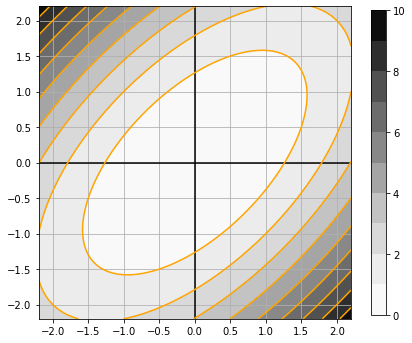

In [1]:
import numpy as np
import matplotlib.pyplot as plt
S = np.array([[5/2, 3/2], [3/2, 5/2]])
La, U = np.linalg.eigh(S)
i = La.argsort()[::-1]; La = La[i]; U = U[:,i]
I = U @ np.diag(1/La) @ U.T
print(La, "\n", U, "\n", I)
x_min = y_min = -2.2; x_max = y_max = 2.2
X, Y = np.meshgrid(np.linspace(x_min, x_max, num=64), np.linspace(y_min, y_max, num=64))
XY = np.c_[np.ravel(X), np.ravel(Y)]
d = lambda xy: xy.T @ I @ xy
D = np.apply_along_axis(d, 1, XY)
fig, ax = plt.subplots(figsize=(7, 7))
ax.set(aspect='equal', xlim=(x_min, x_max), ylim=(y_min, y_max))
ax.grid(); ax.axhline(0, color='black'); ax.axvline(0, color='black')
ax.contour(X, Y, D.reshape(X.shape), 10, colors='orange', linestyles='solid')
cp = ax.contourf(X, Y, D.reshape(X.shape), 10, cmap="Greys")
plt.colorbar(cp, ax=ax, shrink=0.8);